<font size="6"><b>Performing the Random Forest Model</b></font>
#### Creating the Random Forest regression model and measuring the performance of the model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()
nfl_combined_data_dir_path = os.path.join(path, '..\\nfl_combined_data')
files = os.listdir(nfl_combined_data_dir_path)

# Reading the first file. This file will be merged with the other  
# files to create the combined file
file = os.path.join(nfl_combined_data_dir_path, files[0])
df = pd.read_excel(file)
df.head(5)

Unnamed: 0 Home Away    OU  OU 2H  Total Points  Win Margin  \
0           0  PIT  TEN  35.0   17.5            23          -3   
1           1  BAL   KC  37.5   17.0            62         -14   
2           2  CAR  PHI  44.5   20.5            48          28   
3           3  CIN  DEN  44.5   19.5            19           5   
4           4  CLE  MIN  39.5   19.0            54          14   

   Total Points 2H  Win Margin 2H  Incomplete Passes  ...  Sack  Touchdowns  \
0                6              6                 20  ...     5           2   
1               45             31                 24  ...     4           8   
2                7              7                 26  ...     7           6   
3               16             16                 21  ...     6           2   
4               31             31                 21  ...     9           6   

   Pass Touchdowns  Rush Touchdowns  Extra Point Attempts  Two Point Attempts  \
0                2                0                     2                   0   
1                5                2                     7                   0   
2                2                2                     4                   0   
3                1                1                     1                   1   
4                2                3                     5                   0   

   Field Goal Attempts  Punt Attempts  Fumble  Complete Passes  
0                    5             12       3               55  
1                    3              8       3               42  
2                    3              8       4               31  
3                    2             15       2               38  
4                    4             11       3               35  

[5 rows x 29 columns]

In [3]:
frames = [] # Store the dataframes to merge to final dataframe

# Opening files and merging the files to make one file.
for i in range(1, len(files)):
    file = os.path.join(nfl_combined_data_dir_path, files[i])
    df_temp = pd.read_excel(file)
    frames.append(df_temp)
    
df = pd.concat(frames)

In [4]:
df.tail(5)

Unnamed: 0 Home Away    OU  OU 2H  Total Points  Win Margin  \
219         219   KC  LAC  48.0   23.0            52         -10   
220         220   LA  ARI  49.0   22.5            55          -7   
221         221  DEN  OAK  41.5   20.5            31          -1   
222         222  PHI  SEA  46.0   20.0            26           8   
223         223   KC  HOU  48.0   27.0            82         -20   

     Total Points 2H  Win Margin 2H  Incomplete Passes  ...  Sack  Touchdowns  \
219               35              7                 21  ...     3           7   
220               28             28                 30  ...     2           7   
221               18             12                 28  ...     4           2   
222               13              1                 21  ...     9           3   
223               30              4                 25  ...     1           7   

     Pass Touchdowns  Rush Touchdowns  Extra Point Attempts  \
219                3                3                     7   
220                5                2                     7   
221                2                0                     1   
222                2                1                     2   
223                4                3                     6   

     Two Point Attempts  Field Goal Attempts  Punt Attempts  Fumble  \
219                   0                    1              5       0   
220                   0                    3              7       3   
221                   1                    8              8       7   
222                   1                    2             11       6   
223                   1                    4              2       2   

     Complete Passes  
219               47  
220               56  
221               46  
222               46  
223               49  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 223
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2107 non-null   int64  
 1   Home                  2107 non-null   object 
 2   Away                  2107 non-null   object 
 3   OU                    2107 non-null   float64
 4   OU 2H                 2107 non-null   float64
 5   Total Points          2107 non-null   int64  
 6   Win Margin            2107 non-null   int64  
 7   Total Points 2H       2107 non-null   int64  
 8   Win Margin 2H         2107 non-null   int64  
 9   Incomplete Passes     2107 non-null   int64  
 10  Touchbacks            2107 non-null   int64  
 11  Interceptions         2107 non-null   int64  
 12  Fumble Forced         2107 non-null   int64  
 13  Fumble Not Forced     2107 non-null   int64  
 14  Safety                2107 non-null   int64  
 15  Penalty               

In [6]:
df.shape

(2107, 29)

In [7]:
df = df.drop('Unnamed: 0', axis=1) # Dropping the "Unnamed column"

In [8]:
df.sample(5, random_state=0)

Home Away    OU  OU 2H  Total Points  Win Margin  Total Points 2H  \
59   CAR   TB  46.0   23.5            31           3               25   
169   GB  WAS  42.0   20.5            35          -5               15   
46   BUF  NYG  48.0   23.0            34          14               15   
56    SF  ARI  41.0   20.0            46          10               26   
28   MIA  CLE  42.5   22.0            54          -6               25   

     Win Margin 2H  Incomplete Passes  Touchbacks  ...  Sack  Touchdowns  \
59              -3                 20           8  ...     2           3   
169              9                 20           8  ...     8           4   
46              15                 27           3  ...     3           4   
56              26                 33           7  ...     5           7   
28              11                 26           8  ...     5           6   

     Pass Touchdowns  Rush Touchdowns  Extra Point Attempts  \
59                 1                2                     2   
169                2                2                     3   
46                 4                0                     3   
56                 3                3                     3   
28                 3                2                     3   

     Two Point Attempts  Field Goal Attempts  Punt Attempts  Fumble  \
59                    1                    6              9       3   
169                   1                    3             10       3   
46                    1                    3             15       3   
56                    3                    1             12       5   
28                    1                    7             11       4   

     Complete Passes  
59                36  
169               34  
46                48  
56                44  
28                49  

[5 rows x 28 columns]

In [9]:
df.columns

Index(['Home', 'Away', 'OU', 'OU 2H', 'Total Points', 'Win Margin',
       'Total Points 2H', 'Win Margin 2H', 'Incomplete Passes', 'Touchbacks',
       'Interceptions', 'Fumble Forced', 'Fumble Not Forced', 'Safety',
       'Penalty', 'Tackled For Loss', 'Rush Attempts', 'Pass Attempts', 'Sack',
       'Touchdowns', 'Pass Touchdowns', 'Rush Touchdowns',
       'Extra Point Attempts', 'Two Point Attempts', 'Field Goal Attempts',
       'Punt Attempts', 'Fumble', 'Complete Passes'],
      dtype='object')

In [10]:
df.describe()

OU        OU 2H  Total Points   Win Margin  Total Points 2H  \
count  2107.000000  2107.000000   2107.000000  2107.000000      2107.000000   
mean     45.195301    22.353109     45.661130    -2.355007        22.470337   
std       4.206470     3.148794     13.928219    14.610070         9.827547   
min       8.000000    16.000000      6.000000   -58.000000         0.000000   
25%      42.500000    20.500000     36.000000   -10.500000        16.000000   
50%      45.000000    21.500000     45.000000    -3.000000        21.000000   
75%      47.750000    24.000000     54.000000     7.000000        28.000000   
max      60.500000    56.000000    101.000000    49.000000        59.000000   

       Win Margin 2H  Incomplete Passes   Touchbacks  Interceptions  \
count    2107.000000        2107.000000  2107.000000    2107.000000   
mean       12.464642          24.552444     5.940674       1.783579   
std        10.578475           6.140294     2.842626       1.315282   
min       -21.000000           8.000000     0.000000       0.000000   
25%         6.000000          20.000000     4.000000       1.000000   
50%        12.000000          24.000000     6.000000       2.000000   
75%        20.000000          28.000000     8.000000       3.000000   
max        57.000000          48.000000    16.000000       8.000000   

       Fumble Forced  ...         Sack   Touchdowns  Pass Touchdowns  \
count    2107.000000  ...  2107.000000  2107.000000      2107.000000   
mean        1.687708  ...     4.686284     5.142857         3.122924   
std         1.320183  ...     2.339799     2.133930         1.773387   
min         0.000000  ...     0.000000     0.000000         0.000000   
25%         1.000000  ...     3.000000     4.000000         2.000000   
50%         1.000000  ...     4.000000     5.000000         3.000000   
75%         2.000000  ...     6.000000     7.000000         4.000000   
max         7.000000  ...    15.000000    14.000000        13.000000   

       Rush Touchdowns  Extra Point Attempts  Two Point Attempts  \
count      2107.000000           2107.000000         2107.000000   
mean          1.608448              4.494067            0.300427   
std           1.253290              2.000080            0.608904   
min           0.000000              0.000000            0.000000   
25%           1.000000              3.000000            0.000000   
50%           1.000000              4.000000            0.000000   
75%           2.000000              6.000000            0.000000   
max           7.000000             13.000000            6.000000   

       Field Goal Attempts  Punt Attempts       Fumble  Complete Passes  
count          2107.000000    2107.000000  2107.000000      2107.000000  
mean              3.877551       9.293783     2.517323        43.420503  
std               1.786359       3.261414     1.649213         8.248671  
min               0.000000       1.000000     0.000000        20.000000  
25%               3.000000       7.000000     1.000000        38.000000  
50%               4.000000       9.000000     2.000000        43.000000  
75%               5.000000      11.000000     3.000000        48.000000  
max              11.000000      21.000000    11.000000        92.000000  

[8 rows x 26 columns]

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print(df['Home'].values)
print(df['Away'].values)

ohe_tfmr = OneHotEncoder(sparse=False)
print(ohe_tfmr.fit_transform(df[['Home']].values))
print(ohe_tfmr.fit_transform(df[['Away']].values))

['NO' 'NYG' 'CHI' ... 'DEN' 'PHI' 'KC']
['MIN' 'CAR' 'DET' ... 'OAK' 'SEA' 'HOU']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Feature values
categorical_features = ["Home", "Away"]

numerical_features = ["OU", "OU 2H", "Win Margin", "Total Points 2H", "Win Margin 2H",
                "Incomplete Passes", "Touchbacks", "Interceptions", "Fumble Forced",
                "Fumble Not Forced", "Safety", "Penalty", "Tackled For Loss", "Rush Attempts", "Pass Attempts",
                "Sack", "Touchdowns", "Pass Touchdowns", "Rush Touchdowns", "Extra Point Attempts",
                "Two Point Attempts", "Field Goal Attempts", "Punt Attempts", "Fumble", "Complete Passes"]

target = "Total Points"

<AxesSubplot:xlabel='Touchdowns', ylabel='Total Points'>

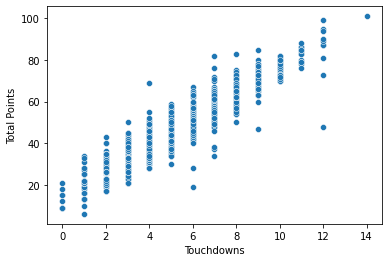

In [13]:
sns.scatterplot(x = numerical_features[16], y = target, data = df)

array([[<AxesSubplot:title={'center':'OU'}>,
        <AxesSubplot:title={'center':'OU 2H'}>,
        <AxesSubplot:title={'center':'Total Points'}>,
        <AxesSubplot:title={'center':'Win Margin'}>,
        <AxesSubplot:title={'center':'Total Points 2H'}>],
       [<AxesSubplot:title={'center':'Win Margin 2H'}>,
        <AxesSubplot:title={'center':'Incomplete Passes'}>,
        <AxesSubplot:title={'center':'Touchbacks'}>,
        <AxesSubplot:title={'center':'Interceptions'}>,
        <AxesSubplot:title={'center':'Fumble Forced'}>],
       [<AxesSubplot:title={'center':'Fumble Not Forced'}>,
        <AxesSubplot:title={'center':'Safety'}>,
        <AxesSubplot:title={'center':'Penalty'}>,
        <AxesSubplot:title={'center':'Tackled For Loss'}>,
        <AxesSubplot:title={'center':'Rush Attempts'}>],
       [<AxesSubplot:title={'center':'Pass Attempts'}>,
        <AxesSubplot:title={'center':'Sack'}>,
        <AxesSubplot:title={'center':'Touchdowns'}>,
        <AxesSubplot:title=

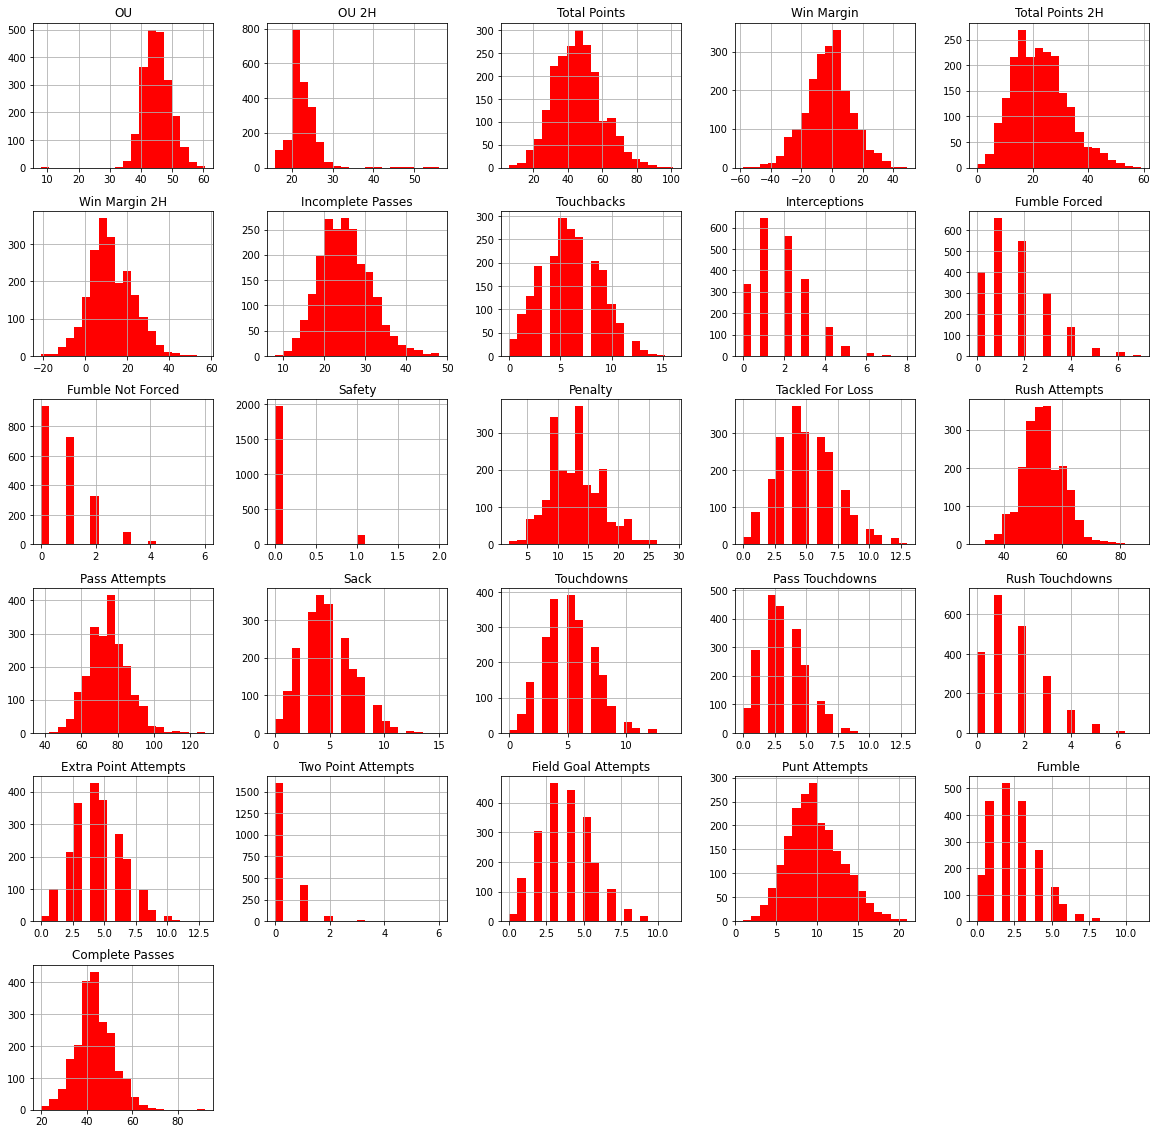

In [14]:
df.hist(bins = 20, figsize = (20,20), color = 'red')

<AxesSubplot:>

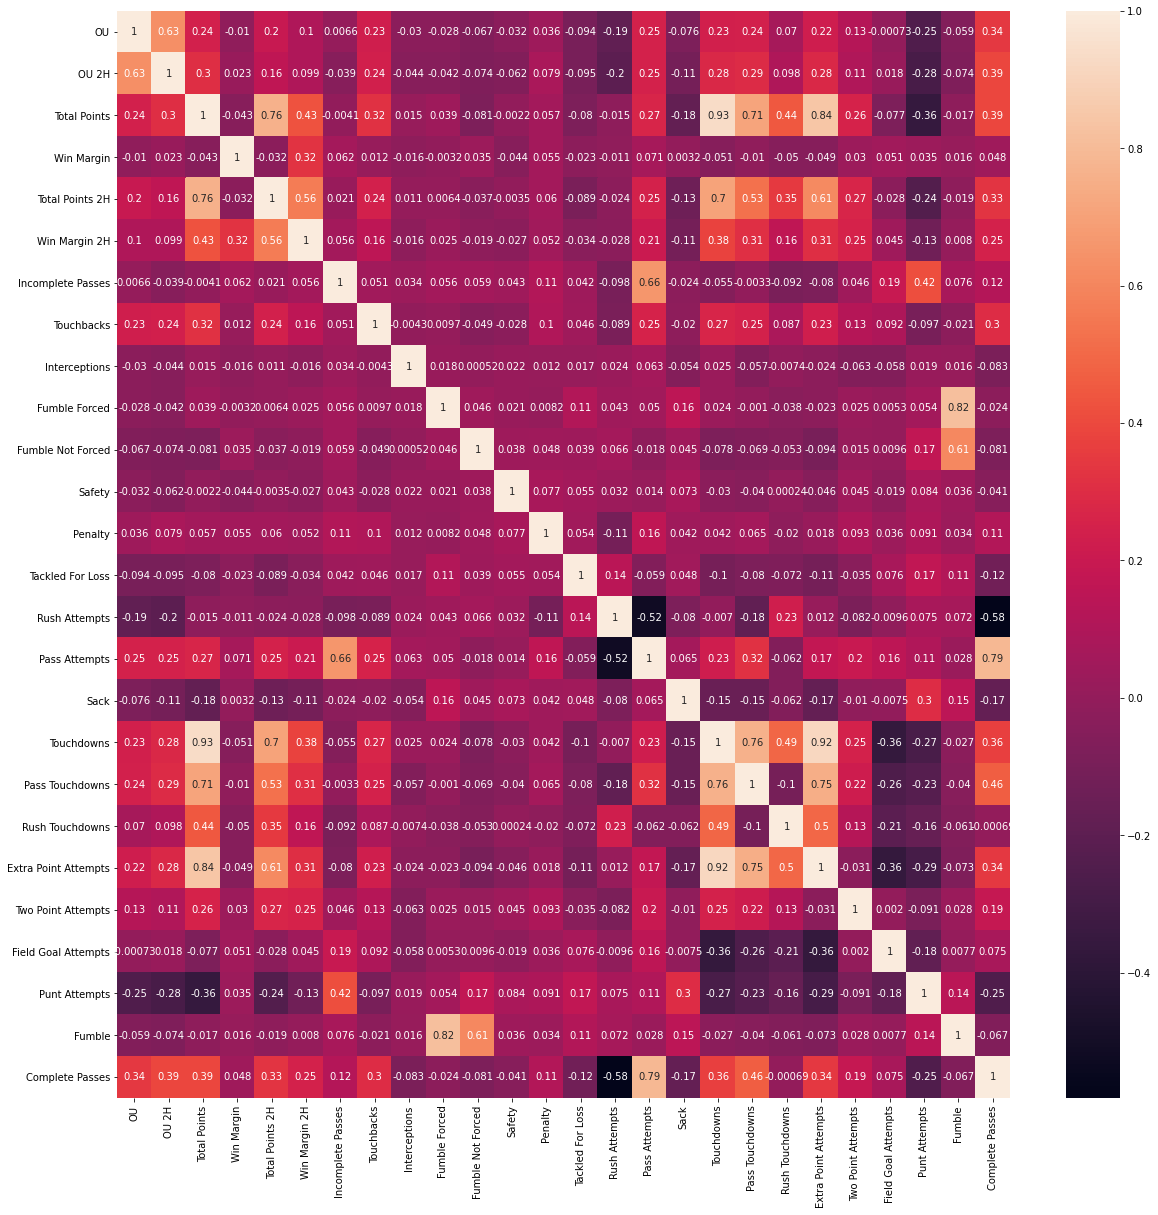

In [15]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

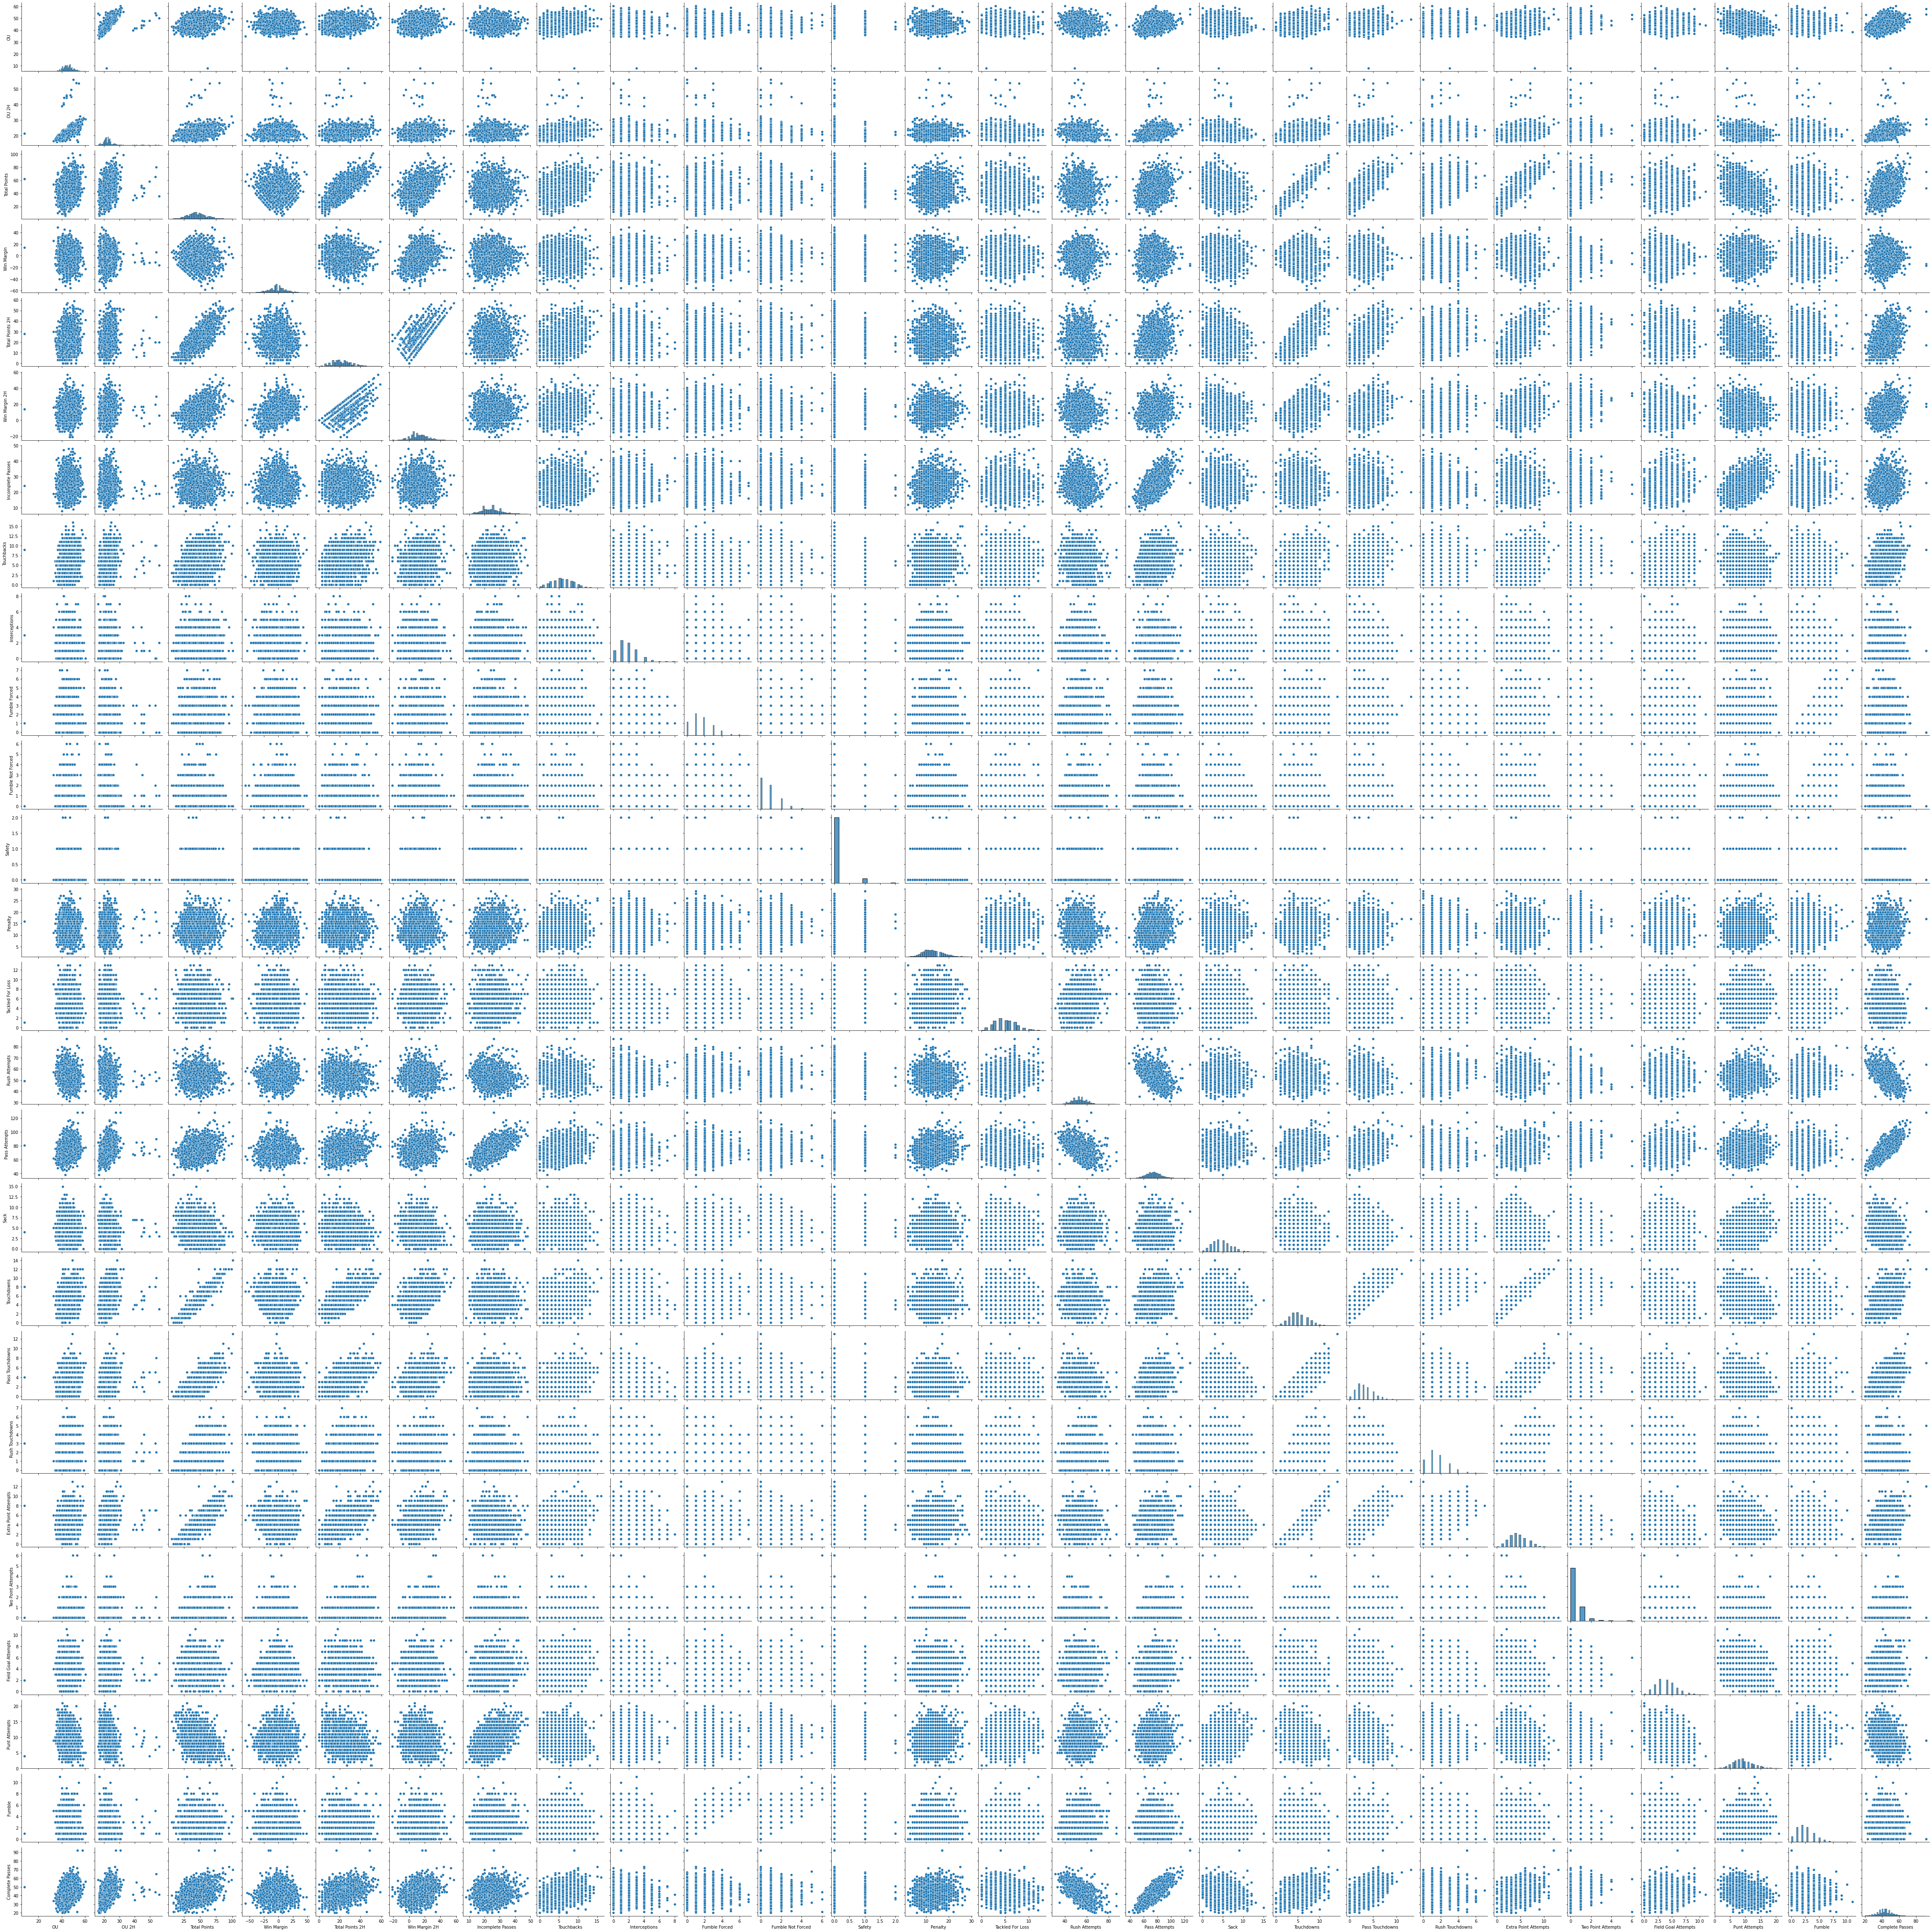

In [16]:
sns.pairplot(df)

In [17]:
df_sample = df[['Total Points', 'Touchdowns', 'Total Points 2H', 'Pass Touchdowns', 'Extra Point Attempts']]
df_sample

Total Points  Touchdowns  Total Points 2H  Pass Touchdowns  \
0              23           3                7                2   
1              49           5               19                4   
2              33           4                6                2   
3              62           8               35                5   
4              31           4                7                3   
..            ...         ...              ...              ...   
219            52           7               35                3   
220            55           7               28                5   
221            31           2               18                2   
222            26           3               13                2   
223            82           7               30                4   

     Extra Point Attempts  
0                       3  
1                       5  
2                       3  
3                       7  
4                       4  
..                    ...  
219                     7  
220                     7  
221                     1  
222                     2  
223                     6  

[2107 rows x 5 columns]

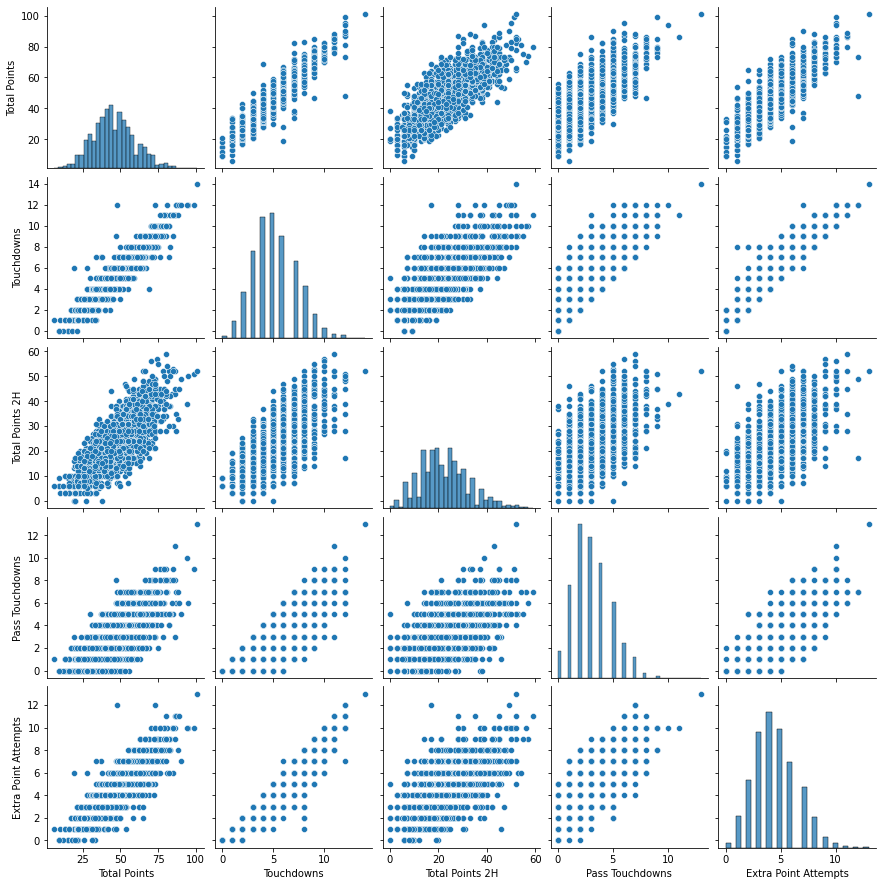

In [18]:
sns.pairplot(df_sample)

In [19]:
# Handling categorical values.
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_features)]

# Handling numerical values
num_si_step = ('si', SimpleImputer(strategy='median'))
num_steps = [num_si_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical_features)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_features + numerical_features])

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Home', 'Away']),
                                ('num',
                                 Pipeline(steps=[('si',
                                                  SimpleImputer(strategy='median'))]),
                                 ['OU', 'OU 2H', 'Win Margin',
                                  'Total Points 2H', 'Win Margin 2H',
                                  'Incomplete Passes', 'Touchbacks',
                                  'Interceptions', 'Fumble Forced',
                                  'Fumble Not Forced', 'Safety', 'Penalty',
                                  'Tackled For Loss', 'Rush Attempts',
                                  'Pass Attempts', 'Sack', 'Touchdowns',
       

In [20]:
from sklearn.model_selection import train_test_split

X = ct.transform(df[categorical_features + numerical_features])
y = df[[target]].values

X

array([[ 0.,  0.,  0., ..., 12.,  2., 42.],
       [ 0.,  0.,  0., ...,  7.,  4., 34.],
       [ 0.,  0.,  0., ..., 13.,  7., 43.],
       ...,
       [ 0.,  0.,  0., ...,  8.,  7., 46.],
       [ 0.,  0.,  0., ..., 11.,  6., 46.],
       [ 0.,  0.,  0., ...,  2.,  2., 49.]])

In [21]:
y

array([[23],
       [49],
       [33],
       ...,
       [31],
       [26],
       [82]], dtype=int64)

In [22]:
X.shape

(2107, 89)

In [23]:
y.shape

(2107, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

X_train.shape

(1685, 89)

In [25]:
X_test.shape

(422, 89)

In [26]:
y_train.shape

(1685,)

In [27]:
y_test.shape

(422,)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params_grid = {
    'n_estimators': [4, 5, 10, 20, 50, 60],
    'max_leaf_nodes': [10, 40, 90, 100],
    'min_samples_split': [2, 4, 8, 10, 12],
    'max_depth': [10, 30, 40, 60, 90, 100]
}

rfr = RandomForestRegressor()
grid_search_rfr = GridSearchCV(rfr, params_grid, scoring="neg_mean_squared_error", cv=10, verbose=1)
grid_search_rfr.fit(X_train, y_train)
grid_search_rfr.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


{'max_depth': 100,
 'max_leaf_nodes': 100,
 'min_samples_split': 8,
 'n_estimators': 50}

In [29]:
np.sqrt(-grid_search_rfr.best_score_)

3.4688367227806354

In [30]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

final_model = grid_search_rfr.best_estimator_
final_model

RandomForestRegressor(max_depth=100, max_leaf_nodes=100, min_samples_split=8,
                      n_estimators=50)

In [31]:
y_test_estimation = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, y_test_estimation)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_test_estimation)
r2 = r2_score(y_test, y_test_estimation)

print("MSE:", final_mse)
print("RMSE:", final_rmse)
print("MAE:", final_mae)
print("R2:", r2)

MSE: 11.37503016092651
RMSE: 3.3726888621582796
MAE: 2.307031503227147
R2: 0.9427837699867803


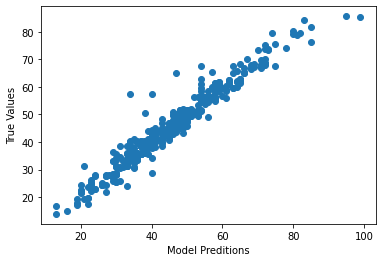

In [32]:
plt.scatter(x=y_test, y=y_test_estimation)
plt.xlabel("Model Preditions")
plt.ylabel("True Values")
plt.show()